# Arsenal Japan Community Questionare Part1

## Arsenalを好きなってくれた方々へのアンケート集計結果

In [1]:
from wordcloud import WordCloud
from PIL import Image

Duplicate key in file PosixPath('/home/ryo_udon/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  sans-serif')


In [2]:
import pandas as pd

In [3]:
questions = ["Since started watching", \
    "Have ever joined PV", \
    "Which PV", \
    "Do you want to join again?", \
    "Thoughts about PV", \
    "How do you get infos", \
    "Your favourite account", \
    "Have ever joind community", \
    "What kind of community you joined", \
    "What kind of community do you want?",\
    "Have you felt nervous to join PV?", \
    "Do you have idea to make easier to attend", \
    "other comments", \
    "", \
    "The reason you like these account"
    ]

#df = pd.read_csv("../../data/202202/arsenal_questionare.csv", names=questions)
df = pd.read_csv("../../data/202202/arsenal_questionare.csv", names=questions,index_col=0)
df = df.iloc[1:, :]

### 日本語フォントの設定

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import matplotlib

print(matplotlib.matplotlib_fname())

#jpn_fonts = list(np.sort([ttf for ttf in font_manager.findSystemFonts() if 'japan' in ttf or 'ipafont' in ttf]))
jpn_fonts = list(np.sort([ttf for ttf in font_manager.findSystemFonts() if 'japan' in ttf]))

jpn_font = jpn_fonts[0]
prop = font_manager.FontProperties(fname=jpn_font)

print(jpn_fonts)
print(jpn_font)

plt.rcParams['font.family'] = prop.get_name()

/home/ryo_udon/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
['/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', '/usr/share/fonts/truetype/fonts-japanese-mincho.ttf']
/usr/share/fonts/truetype/fonts-japanese-gothic.ttf


## How long are you supporting Arsenal? / Arsenalを見始めてどのぐらいですか？

['IPAexGothic']
[' > 10 years', '3 ~ 10 years', '1 ~ 3 years', '< 1 year']


<Figure size 720x576 with 0 Axes>

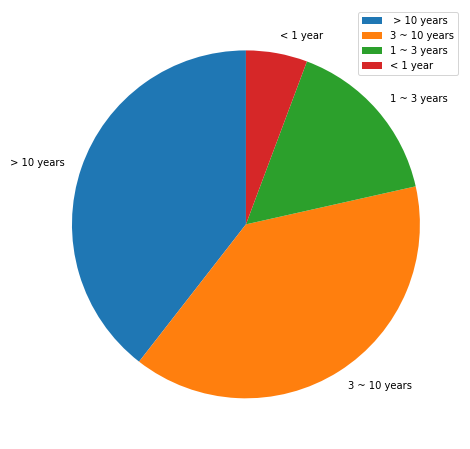

In [20]:
years_df = df.iloc[:,0]

print(plt.rcParams['font.family'])

label = list(years_df.value_counts().index)

for i in range(len(label)):
    if label[i].find("10年以上") != -1:
        label[i] = " > 10 years"
    elif label[i].find("3~10年") != -1:
        label[i] = "3 ~ 10 years"
    elif label[i].find("1~3年") != -1:
        label[i] = "1 ~ 3 years"
    else:
        label[i] = "< 1 year"

print(label)

sizes = list(years_df.value_counts())

plt.figure(figsize=(10,8))

fig,ax = plt.subplots(figsize=(10,8))

ax.pie(
    sizes,
    labels=label,
    counterclock=True,
    startangle=90
)

ax.title("")
ax.legend(loc="upper right")



## How do you get infos about Arsenal? / Arsenalの情報はどのように収集していますか？

['Arsenal.com', 'News Website', 'Web Blog', 'Web Forum', 'Twitter', 'Instagram', 'Others']


<Figure size 1008x576 with 0 Axes>

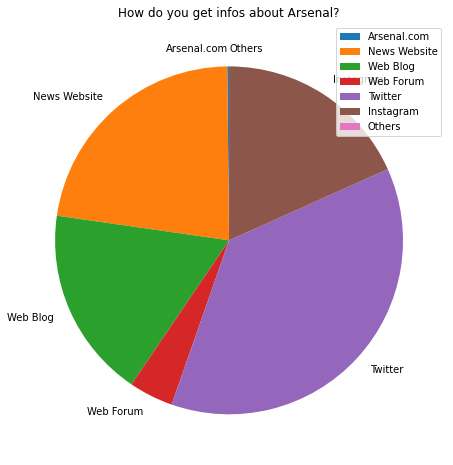

In [28]:

info_df = df.iloc[:,5]

#label = list(info_df.value_counts().index)
#sizes = list(info_df.value_counts())

label_jp = ["公式ホームページ","ニュースサイト", "ブログ", "掲示板", "Twitter", "インスタ", ]
label = ["Arsenal.com", "News Website", "Web Blog", "Web Forum", "Twitter", "Instagram", "Others"]

def CountUpItems(df, label):
    sizes = [0 for i in range(len(label)+1)]

    for row in df:

        counted = 0
        for i in range(len(label)):
            if row.find(label[i]) != -1:
                sizes[i] = sizes[i] + 1
                counted = counted + 1
        if counted == 0:
            sizes[-1] = sizes[-1] + 1

    return(sizes)


sizes = CountUpItems(info_df, label_jp)


print(label)


plt.figure(figsize=(14,8))

fig,ax = plt.subplots(figsize=(10,8))

ax.pie(
    sizes,
    labels=label,
    counterclock=True,
    startangle=90
)

ax.set_title("How do you get infos about Arsenal?")
ax.legend(loc="upper right")


## Word Cloud Creating Functions / Word Cloud 作成用関数

In [7]:


from janome.tokenizer import Tokenizer

def SplitAccountData(text_data):
    edited_data = text_data.replace(" ",",")
    edited_data = edited_data.replace("、",",")
    edited_data = edited_data.replace("さん",",")
    edited_data = edited_data.split(",")

    return(edited_data)


def CreateWordList(sns_df):
    #print(data)
    t = Tokenizer()
    words = []
    noun_tokens = []
    for text_data in sns_df:
        edited_data = SplitAccountData(text_data)
        #print(text_data, "-->", edited_data)

        flag = False
        for data in edited_data:
            if len(data) >10:
                continue
            tokens = t.tokenize(data)
            complete_word = ""
            prev_word_counter = 0
            word_counter = 0
            for token in tokens:
                pos = token.part_of_speech.split(',')[0]
                if pos in ['名詞']:
                    flag = True
            if flag == True:
                words.append(data)

    return(words)


## Create Favourite SNS Account Word Cloud!!/どのようなSNSアカウントを見ていますか?

In [8]:

sns_df = df.iloc[:,6]
sns_df.dropna(how="all",inplace=True)


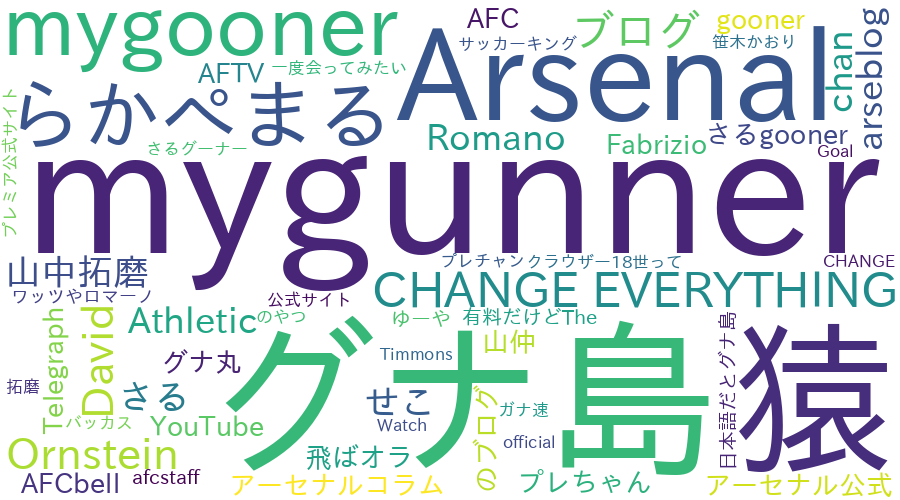

In [9]:
text = ' '.join(CreateWordList(sns_df))
font_path = "/home/ryo_udon/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
wordcloud = WordCloud(background_color="white", font_path=font_path,width=900, height=500).generate(text)
wordcloud.to_file("./snsaccount_cloud.png")


image_array = wordcloud.to_array()
img = Image.fromarray(image_array)
img

## Create Joining Community / どのようなコミュニティに参加していますか？

In [10]:

sns_df = df.iloc[:,8]
sns_df.dropna(how="all",inplace=True)

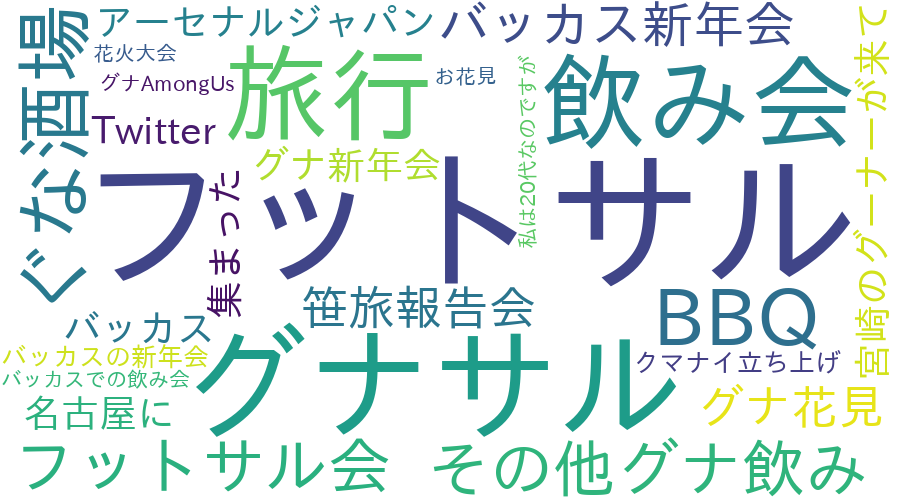

In [11]:
text = ' '.join(CreateWordList(sns_df))
font_path = "/home/ryo_udon/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
wordcloud = WordCloud(background_color="white", font_path=font_path,width=900, height=500).generate(text)
wordcloud.to_file("./community_cloud.png")

image_array = wordcloud.to_array()
img = Image.fromarray(image_array)
img